<a href="https://colab.research.google.com/github/pbhuch/GL_DecA_G4_NLP1/blob/NLP1_PB/GL_DecA_G4_NLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Great Learning : AIML Online Capstone -AUTOMATIC TICKET ASSIGNMENT

DecA : Group 4: NLP 1

Group Members :
1. Priya Moily
2. Priyanka Gupta
3. Avinash Balani
4. Priyank Bhuch

Importing relavant Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
df = pd.read_csv("sample_data/dataset1_combined.csv", encoding = 'utf-8')

In [6]:
df_copy = df.copy()

In [19]:
df_copy.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,combined_description,combined_description_caller
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error owlgqjme qhcozdfx


In [20]:
df.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,combined_description,combined_description_caller
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error owlgqjme qhcozdfx


In [7]:
df.shape

(8417, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8417 non-null   int64 
 1   Short description            8409 non-null   object
 2   Description                  8416 non-null   object
 3   Caller                       8417 non-null   object
 4   Assignment group             8417 non-null   object
 5   combined_description         8417 non-null   object
 6   combined_description_caller  8417 non-null   object
dtypes: int64(1), object(6)
memory usage: 460.4+ KB


In [21]:
df.columns

Index(['Unnamed: 0', 'Short description', 'Description', 'Caller',
       'Assignment group', 'combined_description',
       'combined_description_caller'],
      dtype='object')

In [8]:
df.drop(['Unnamed: 0','Short description','Description','Caller','combined_description_caller','Assignment group'],axis='columns', inplace=True)

In [5]:
df.head()

,combined_description
0,login issue -verified user details.(employee# ...
1,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,unable to access hr_tool page unable to access...
4,skype error skype error


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   combined_description  8417 non-null   object
dtypes: object(1)
memory usage: 65.9+ KB


In [9]:
df.isnull().sum()

combined_description    0
dtype: int64

In [10]:
def fn_decode_to_ascii(df):
  text = df.encode().decode('utf-8').encode('ascii', 'ignore')
  return text.decode("utf-8") 

df['combined_description'] = df['combined_description'].apply(fn_decode_to_ascii)

In [13]:
regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

In [26]:
df.tail(20)

,combined_description
8397,customer group enhanced field _x000D_\n_x000D_...
8398,ess portal received from: eagvusbr.nguqityl@gm...
8399,robot HostName_776 is inactive robot HostName_...
8400,fw: case id [ref:_case-111121032:ref] :: other...
8401,please remove user hugcadrn ixhlwdgt (ralfteim...
8402,ticket update on inc1538505 to user hbmwlprq i...
8403,ticket update on ticket_no0427635 ticket updat...
8404,telephony_software is missing from pc pc recei...
8405,erp account unlock name:mfeyouli ndobtzpw\nlan...
8406,account locked account locked


In [19]:
def fn_remove_irrelaventWords(df,columnName):
  for index in range(len(df)):
    df[columnName][index] = df[columnName][index].lower()
    df[columnName][index] = re.sub(regex,"",df.loc[index,columnName])
    df[columnName][index] = re.sub(r'\S*@\S*\s?', '', df.loc[index,columnName])
    df[columnName][index] = re.sub(r"received from:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"from:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"to:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"subject:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"sent:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"ic:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"cc:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"bcc:",' ',df.loc[index,columnName])
    # Remove numbers 
    df[columnName][index] = re.sub(r'\d+','' ,df.loc[index,columnName])
    # Remove new line characters 
    df[columnName][index] = re.sub(r'\n',' ',df.loc[index,columnName])
    # Remove hashtag while keeping hashtag text
    df[columnName][index] = re.sub(r'#','', df.loc[index,columnName])
    #& 
    df[columnName][index] = re.sub(r'&;?', 'and',df.loc[index,columnName])
    # Remove HTML special entities (e.g. &amp;)
    df[columnName][index] = re.sub(r'\&\w*;', '', df.loc[index,columnName])
    # Remove hyperlinks
    df[columnName][index] = re.sub(r'https?:\/\/.*\/\w*', '', df.loc[index,columnName])
   return df

In [20]:
df_withCleanData = fn_remove_irrelaventWords(df,"combined_description")

In [21]:
df_withCleanData.head(50)

,combined_description
0,login issue -verified user details.(employee a...
1,"outlook _xd_ _xd_ _xd_ hello team,_xd_ _xd_ ..."
2,cant log in to vpn _xd_ _xd_ _xd_ hi_xd_ _xd...
3,unable to access hr_tool page unable to access...
4,skype error skype error
5,unable to log in to engineering tool and skype...
6,event: critical:hostname_.company.com the valu...
7,ticket_no- employment status - new non-employe...
8,unable to disable add ins on outlook unable to...
9,ticket update on inplant_ ticket update on inp...


In [11]:
df_withCleanData.to_csv("dataset1_combined_CleanData")

In [22]:
df_withCleanData_copy = df_withCleanData.copy()

In [23]:
pip install ftfy

In [24]:
from ftfy import fix_encoding, fix_text, badness

In [25]:
def is_mojibake_impacted(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False 


In [26]:
# Check the dataset for mojibake impact
df_withCleanData[~df_withCleanData.iloc[:,:-1].applymap(is_mojibake_impacted).all(1)]

,combined_description


In [27]:
df_withCleanData.head()

,combined_description
0,login issue -verified user details.(employee a...
1,"outlook _xd_ _xd_ _xd_ hello team,_xd_ _xd_ ..."
2,cant log in to vpn _xd_ _xd_ _xd_ hi_xd_ _xd...
3,unable to access hr_tool page unable to access...
4,skype error skype error


In [28]:
df_withCleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   combined_description  8417 non-null   object
dtypes: object(1)
memory usage: 65.9+ KB


In [19]:
df_withCleanData.isnull().sum()

combined_description    0
dtype: int64

In [29]:
df_withCleanData['combined_description'] = df_withCleanData['combined_description'].apply(fix_text) 

In [30]:
df_withCleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   combined_description  8417 non-null   object
dtypes: object(1)
memory usage: 65.9+ KB


In [31]:
pip install langdetect

In [32]:
from langdetect import detect

In [33]:
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'                                                  



In [34]:
df_withCleanData['Language'] = df_withCleanData['combined_description'].apply(fn_lan_detect)

In [35]:
df['Language'].value_counts()

en    6857
de     390
af     290
sl     130
it     125
fr     102
no      98
nl      71
da      69
sv      56
es      53
ca      50
pl      23
pt      19
tl      14
cy      12
ro      10
sq       9
so       8
hr       7
et       6
fi       5
cs       3
id       3
lv       3
sk       2
lt       1
vi       1
Name: Language, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


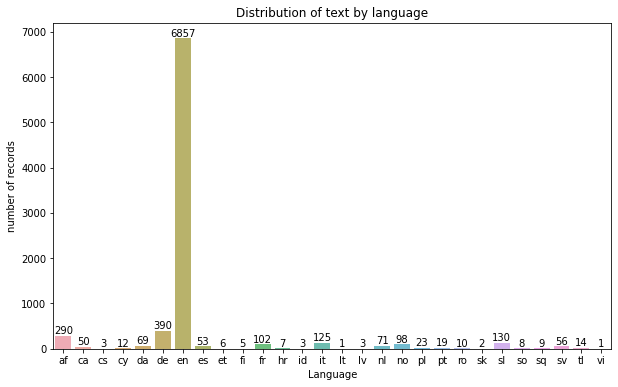

In [36]:
x = df["Language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [37]:
df_withCleanData.head()

,combined_description,Language
0,login issue -verified user details.(employee a...,en
1,"outlook _xd_ _xd_ _xd_ hello team,_xd_ _xd_ ...",en
2,cant log in to vpn _xd_ _xd_ _xd_ hi_xd_ _xd...,en
3,unable to access hr_tool page unable to access...,en
4,skype error skype error,no


In [40]:
pip install goslate

  Created wheel for goslate: filename=goslate-1.5.1-py3-none-any.whl size=11411 sha256=9f4c4e36dc8a89f5b471d7cc5cbc1073b0076c8cefba63325d96fa4edcc70693
  Stored in directory: /root/.cache/pip/wheels/16/5c/86/f561bb944dc9f853f9502427bde8fe557a6fafe146d4a432f2
Successfully built goslate


In [41]:
from goslate import Goslate

In [44]:
import goslate

In [42]:
svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
svc_urls = ['http://translate.google' + domain for domain in svc_domains]

In [45]:
gs = goslate.Goslate()

In [50]:
df_withCleanData['ConvertedToEnglish'] = df_withCleanData['combined_description']

In [62]:
df_withCleanData.head()

,combined_description,Language,ConvertedToEnglish
0,login issue -verified user details.(employee a...,en,login issue -verified user details.(employee a...
1,"outlook _xd_ _xd_ _xd_ hello team,_xd_ _xd_ ...",en,"outlook _xd_ _xd_ _xd_ hello team,_xd_ _xd_ ..."
2,cant log in to vpn _xd_ _xd_ _xd_ hi_xd_ _xd...,en,cant log in to vpn _xd_ _xd_ _xd_ hi_xd_ _xd...
3,unable to access hr_tool page unable to access...,en,unable to access hr_tool page unable to access...
4,skype error skype error,no,skype error skype error


In [55]:
def fn_convertToEnglish(df,columnName):
  for index in range(len(df)):
    if not df['Language'][index] == "en":
      gs.translate(df[columnName][index],'en',source_language='auto')

In [59]:
fn_convertToEnglish()

HTTPError: ignored

In [57]:
pip install -U deep_translator

     |████████████████████████████████| 97 kB 7.7 MB/s 
     |████████████████████████████████| 97 kB 8.6 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.3 which is incompatible.


In [58]:
from deep_translator import GoogleTranslator

In [61]:
def fn_convertToEnglish_deepTrans(df,columnName):
  for index in range(len(df)):
    if not df['Language'][index] == "en":
      #gs.translate(df[columnName][index],'en',source_language='auto')
      translated = GoogleTranslator(source='auto',target='en').translate(text=df[columnName][index])
      df[columnName][index]=translated

In [63]:
fn_convertToEnglish_deepTrans(df_withCleanData,'ConvertedToEnglish')

NotValidPayload: ignored

In [ ]:
df_withCleanData['combined_description'] = df_withCleanData.apply(lambda x: x['com'])

In [ ]:
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df
    
    
df['English_Description'] = df.apply(lambda x: fn_translate(x['combined_description'], x['Language']), axis=1)

In [ ]:
df.head()

,combined_description,Language,English_Description
0,login issue -verified user details.(employee# ...,en,login issue -verified user details.(employee# ...
1,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,en,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,cant log in to vpn _x000D_\n_x000D_\nreceived ...,en,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,unable to access hr_tool page unable to access...,en,unable to access hr_tool page unable to access...
4,skype error skype error,no,skype error skype error


In [ ]:
df.shape

(8417, 3)

In [ ]:
df_copy['English_Description'] = df['English_Description']

In [ ]:
df_copy.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,combined_description,combined_description_caller,English_Description
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error owlgqjme qhcozdfx,skype error skype error


In [ ]:
df_copy['Language'] = df['Language']

In [ ]:
df_copy.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,combined_description,combined_description_caller,English_Description,Language
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,en
1,1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,en
2,2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn _x000D_\n_x000D_\nreceived ...,en
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error owlgqjme qhcozdfx,skype error skype error,no


In [ ]:
df_copy.to_csv("dataset1_combined_translatedToEnglish")